In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
temp = defaultdict(list)

with open('./output/2025_04_12_12_08_21/loss.txt', 'r') as f:
    for line in f:
        epoch, loss = map(str.strip, line.rstrip().split('|'))
        _, epoch = map(str.strip, epoch.split(':'))
        _, loss = map(str.strip, loss.split(':'))

        epoch = int(epoch)
        loss = float(loss)

        temp[epoch].append(loss)

losses = []

for i in range(len(temp)):
    losses.append(sum(temp[i]) / len(temp[i]))

In [15]:
recalls = []

with open('./output/2025_04_12_12_08_21/validation.txt', 'r') as f:
    for line in f:
        temp = {}
        data = map(str.strip, line.rstrip().split('|'))
        try:
            for d in data:
                k, v = map(str.strip, d.split(':'))
                temp[k] = int(v) if k == 'epoch' else float(v)

            temp['rsum'] = sum([y for x, y in temp.items() if x != 'epoch'])
            recalls.append(temp['rsum'])
        except ValueError:
            pass


In [16]:
losses = np.array(losses)
recalls = np.array(recalls)

losses = np.expand_dims(losses, 1)
recalls = np.expand_dims(recalls, 1)

scaler_recalls = MinMaxScaler()
scaler_losses = MinMaxScaler()

recalls = scaler_recalls.fit_transform(recalls)
losses = scaler_losses.fit_transform(losses)

In [17]:
losses = losses.squeeze(1)
recalls = recalls.squeeze(1)

In [19]:
best_epoch = recalls.argmax()

In [26]:
losses.argmax()

43

In [27]:
best_epoch

42

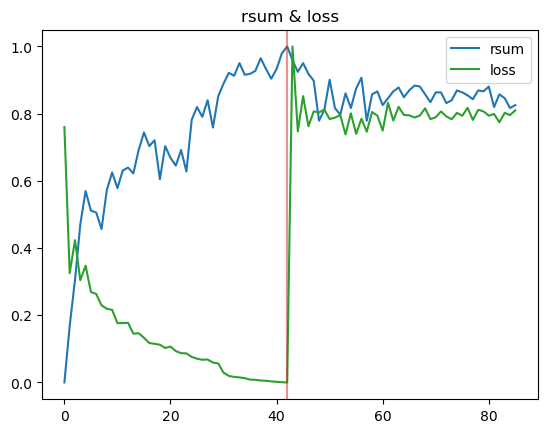

In [24]:
plt.plot(range(len(recalls)), recalls, color='tab:blue', label='rsum')
plt.plot(range(len(losses)), losses, color='tab:green', label='loss')
plt.axvline(best_epoch, color='tab:red', alpha=0.5)
plt.title('rsum & loss')
plt.legend()
plt.savefig('./plots/validation_recall_loss_plot.png', dpi=300)